## Interventions for Questions where diagram is Essential

Numbers:
1. No Errors: 24
2. Calculation Error: 1
3. Conceptual Error: 9
4. Misread Diagram: 12

Total: 46
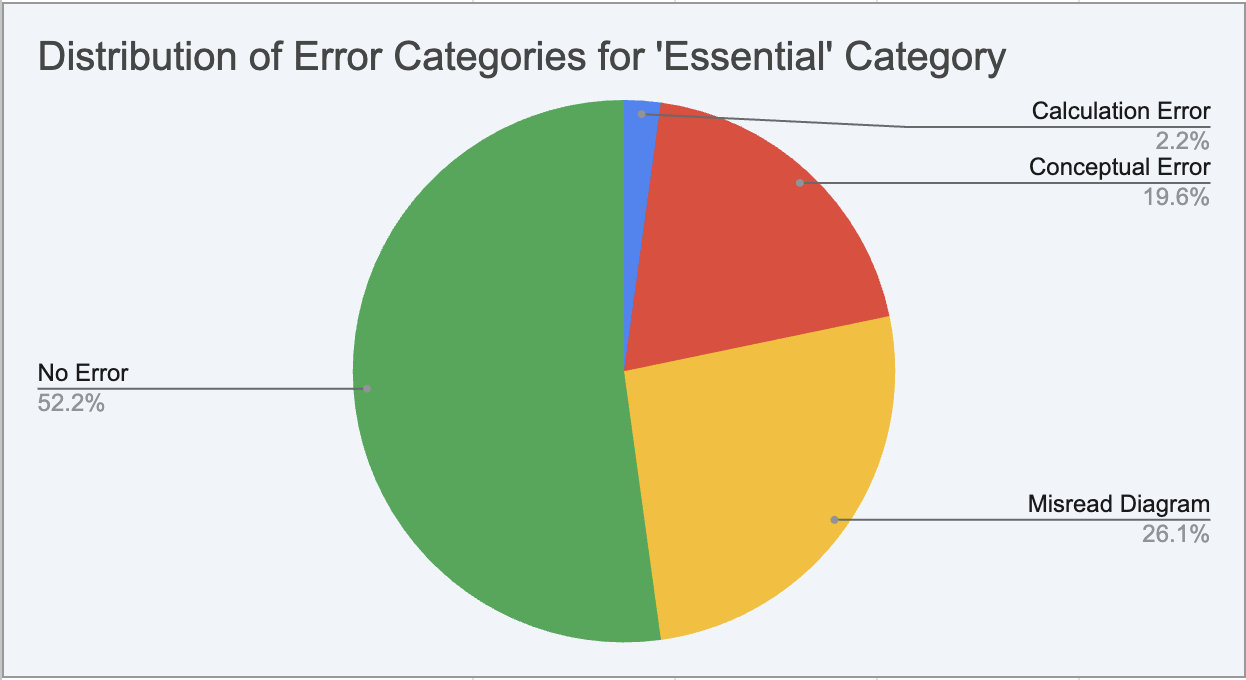

## Boilerplate Code

In [1]:
import json
import os
from dotenv import load_dotenv
import json
from pathlib import Path
from openai import OpenAI
import base64, mimetypes
from IPython.display import Image, display
import time
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
from google.colab import drive
drive.mount('/content/drive')
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')
import cv2

Mounted at /content/drive


In [20]:
history = []
client = OpenAI(api_key=OPENAI_API_KEY)
def reset_history(system_message=""):
    """Reset chat history with a fresh system prompt."""
    global history
    history = [
        {
            "role": "system",
            "content": [
                {"type": "input_text", "text": system_message}
            ],
        }
    ]
    return history


# Initialize default history
reset_history()


# -------------------------
# Helper: Encode images → data URLs
# -------------------------
def encode_images(image_paths):
    blocks = []
    for img_path in image_paths or []:
        mime, _ = mimetypes.guess_type(img_path)
        mime = mime or "image/png"
        with open(img_path, "rb") as f:
            b64 = base64.b64encode(f.read()).decode("utf-8")
        data_url = f"data:{mime};base64,{b64}"
        blocks.append({"type": "input_image", "image_url": data_url})
    return blocks


# -------------------------
# Chat Turn Function (images optional)
# -------------------------
def chat_turn(user_message: str, image_paths=None):
    # Build user's message content
    content_blocks = encode_images(image_paths)
    content_blocks.append({"type": "input_text", "text": user_message})

    # Add to history
    history.append({
        "role": "user",
        "content": content_blocks,
    })

    # Call model with all previous turns
    response = client.responses.create(
        model="gpt-5",
        input=history,
        reasoning={"effort": "low"},
        text={"verbosity": "low"}
    )

    # Extract assistant text response
    assistant_text = response.output_text  # ❤️ simple helper from new API

    # Append back into history
    history.append({
        "role": "assistant",
        "content": [
            {"type": "output_text", "text": assistant_text}
        ],
    })

    return assistant_text

## Misread Diagram

###Q37

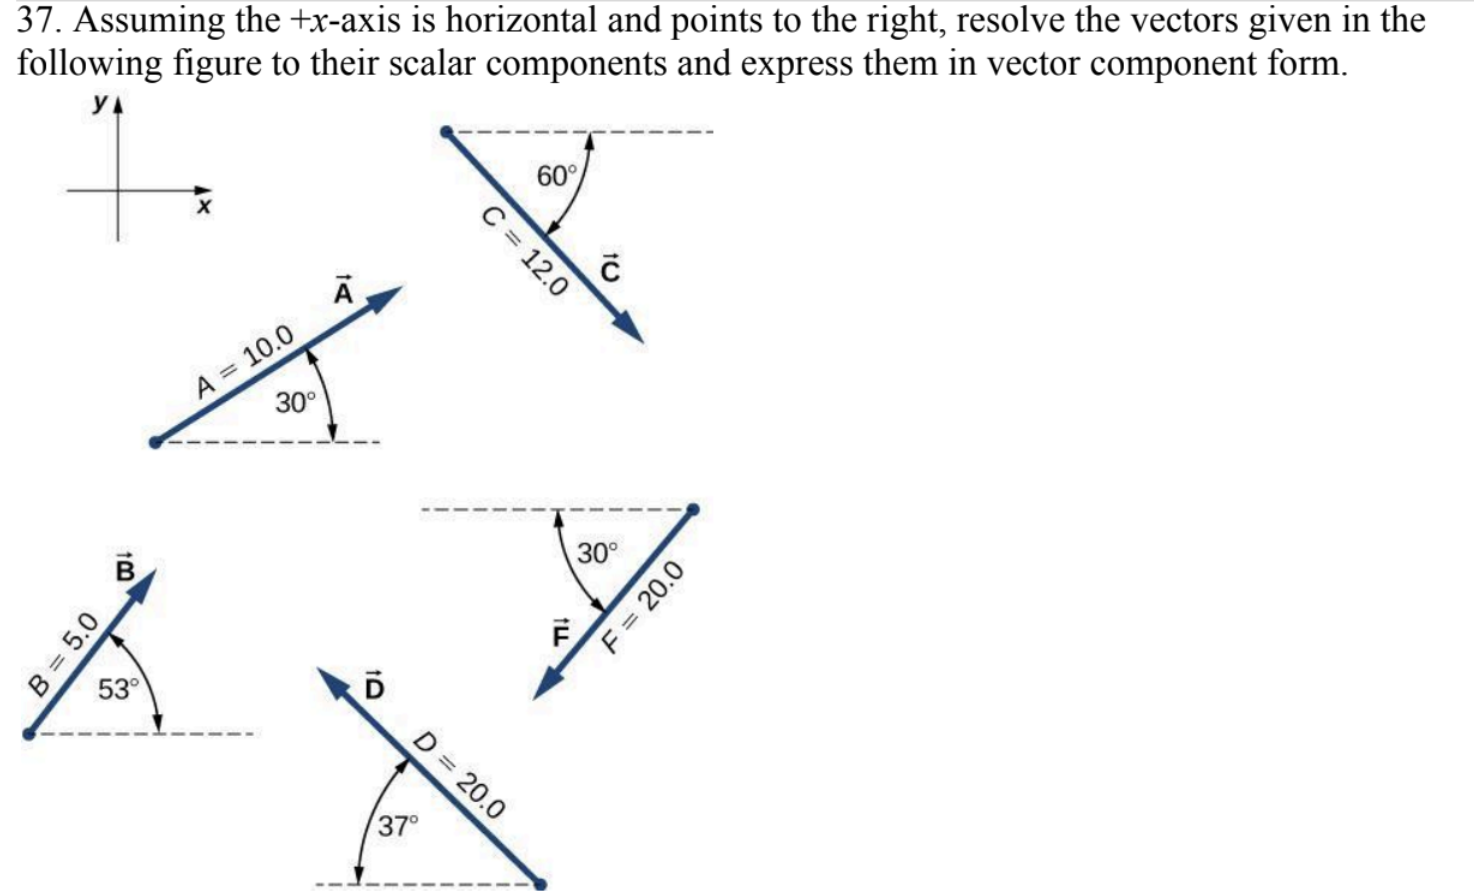




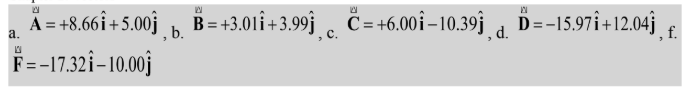

In [27]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/37/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- A coordinate frame with +x to the right and +y up.
- Five vectors labeled A, B, C, D, and F with given magnitudes and angles to the horizontal:
  - A: magnitude 10.0, 30° above the +x axis (first quadrant).
  - B: magnitude 5.0, 53° above the +x axis (first quadrant).
  - C: magnitude 12.0, 60° below the horizontal, pointing down-right (fourth quadrant).
  - D: magnitude 20.0, drawn along a line sloping down to the right; the angle shown is 37° to the leftward horizontal.
  - F: magnitude 20.0, 30° below the horizontal, pointing down-left (third quadrant).


In [28]:
prompt = (
        "Corrections: "
        "1. Vector D is pointing up-left "
    )
resp = chat_turn(prompt)
print(resp)

Noted. Correction:
- D: magnitude 20.0, pointing up-left (second quadrant), its line makes a 37° angle with the leftward horizontal.


In [30]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

Vector components (i, j):
- A = (10 cos30°, 10 sin30°) = (8.66, 5.00)
- B = (5 cos53°, 5 sin53°) = (3.01, 3.99)
- C = (12 cos(−60°), 12 sin(−60°)) = (6.00, −10.4)
- D = (20 cos143°, 20 sin143°) = (−16.0, 12.0)
- F = (20 cos210°, 20 sin210°) = (−17.3, −10.0)


In [31]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###Q53
#### The question is slightly ambiguous—each sub-part seems to require a different resulting vector, but the wording makes it sound as if there is only one final vector R for the entire problem
Interventions that worked:
1. Describe-then-Solve: Because the model focused on the detailed diagram description, it didn't solve the full problem until prompted with “Solve all parts of the question.”

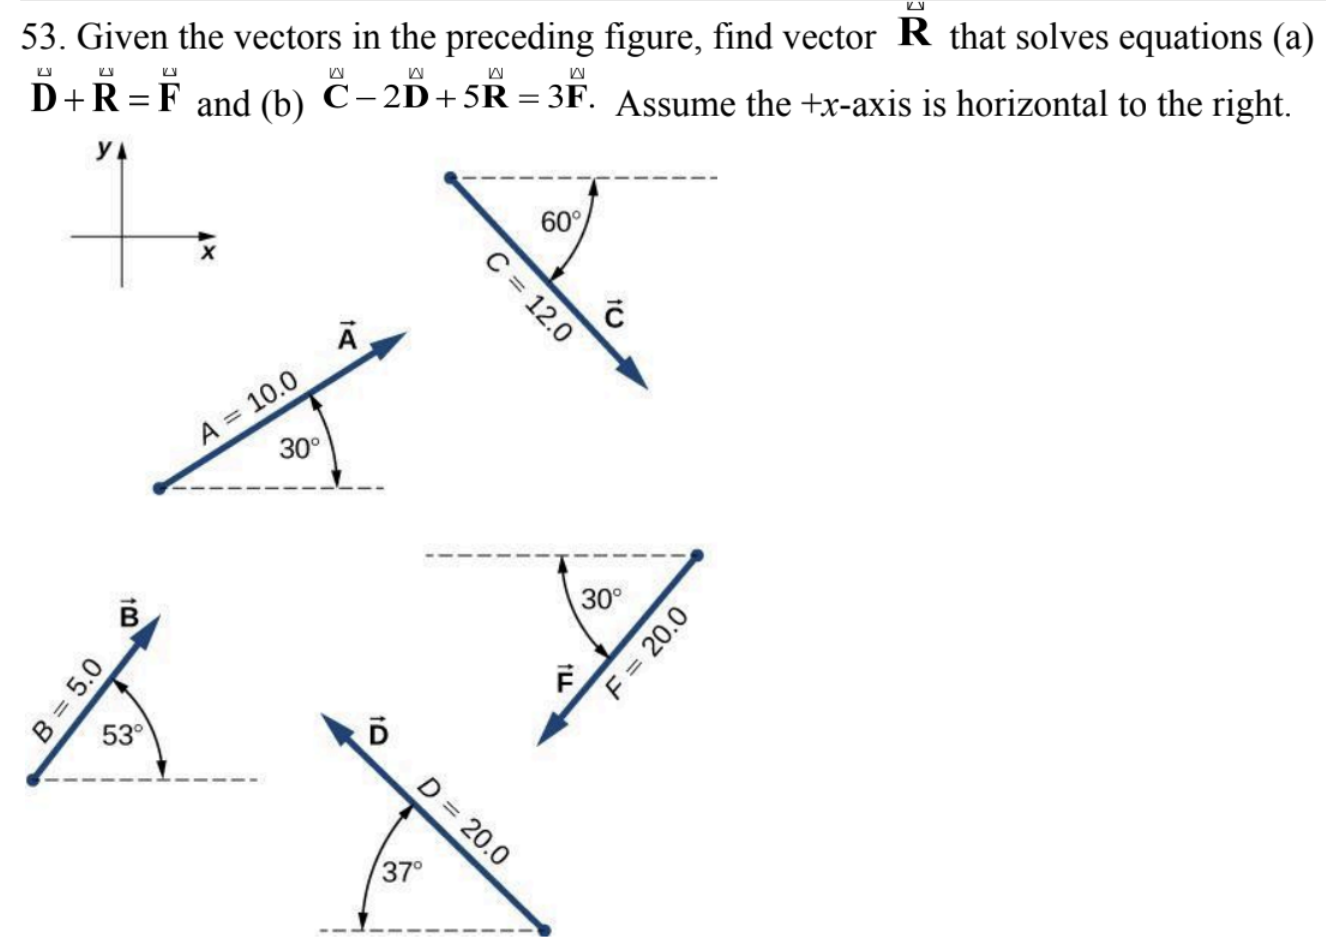

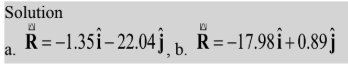

####Describe-Then-Solve

In [ ]:
prompt = (
        "You are an expert physics professor. "
        "Solve the problem and all sub-parts step-by-step. "
        "For each part: write the key equation then substitute numbers and then compute. "
        "State assumptions if needed. "
        "Round your calculations to 2 decimal places. "
        "Be precise and concise—no extra commentary."
        "Answer in a human readable format "
       f"See the Diagram description carefully and answer the question: {diagram_description} "
       "Solve all parts of the question"

    )
answer = generate_anthropic_answer(prompt=prompt,THINKING_BUDGET=7000, image_paths=[
    "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/53/q.png",
])
print(answer)

# Solution

## Step 1: Determine vector components from the figure

**Vector A:** (magnitude 10.0, 30° above horizontal, pointing up-right)
- $\vec{A} = 10.0\cos(30°)\hat{i} + 10.0\sin(30°)\hat{j} = 8.66\hat{i} + 5.00\hat{j}$

**Vector B:** (magnitude 5.0, 53° above horizontal, pointing up-right)
- $\vec{B} = 5.0\cos(53°)\hat{i} + 5.0\sin(53°)\hat{j} = 3.01\hat{i} + 3.99\hat{j}$

**Vector C:** (magnitude 12.0, 60° below horizontal, pointing down-right)
- $\vec{C} = 12.0\cos(-60°)\hat{i} + 12.0\sin(-60°)\hat{j} = 6.00\hat{i} - 10.39\hat{j}$

**Vector D:** (magnitude 20.0, 37° above horizontal, pointing up-left)
- Angle from +x-axis: 143°
- $\vec{D} = 20.0\cos(143°)\hat{i} + 20.0\sin(143°)\hat{j} = -15.97\hat{i} + 12.04\hat{j}$

**Vector F:** (magnitude 20.0, 30° below horizontal, pointing down-left)
- Angle from +x-axis: 210°
- $\vec{F} = 20.0\cos(210°)\hat{i} + 20.0\sin(210°)\hat{j} = -17.32\hat{i} - 10.00\hat{j}$

---

## Part (a): Solve $\vec{D} + \vec{R} = \vec{F}$

**Key equation:*

####Explicit Direction Override Prompting (Winner)

In [ ]:
prompt = (
        "Solve the question. "
        "Follow these hints before solving the question: "
        "Vector A points in UP-RIGHT direction "
        "Vector B points in UP-RIGHT direction "
        "Vector C points in DOWN-RIGHT direction "
        "Vector D points in UP-LEFT direction "
        "Vection F points in DOWN-LEFT direction "
        "The question is a little vague "
        "You are suppose to calculate 2 different vectors for each subpart"
        "ALWAYS FOLLOW THESE HINTS"
    )
answer = generate_anthropic_answer(prompt=prompt,image_paths=[
    "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/53/q.png",
])
print(answer)

I'll solve this problem by first expressing all vectors in component form, then solving both equations for vector **R**.

## Step 1: Express all vectors in component form

**Vector A:** magnitude = 10.0, angle = 30° above horizontal (UP-RIGHT)
- A = 10.0(cos 30°**i** + sin 30°**j**) = 10.0(0.866**i** + 0.5**j**) = **8.66i + 5.0j**

**Vector B:** magnitude = 5.0, angle = 53° above horizontal (UP-RIGHT)
- B = 5.0(cos 53°**i** + sin 53°**j**) = 5.0(0.6**i** + 0.8**j**) = **3.0i + 4.0j**

**Vector C:** magnitude = 12.0, angle = 60° below horizontal (DOWN-RIGHT)
- C = 12.0(cos(-60°)**i** + sin(-60°)**j**) = 12.0(0.5**i** - 0.866**j**) = **6.0i - 10.39j**

**Vector D:** magnitude = 20.0, angle = 37° above horizontal pointing LEFT (UP-LEFT)
- D = 20.0(cos 143°**i** + sin 143°**j**) = 20.0(-0.8**i** + 0.6**j**) = **-16.0i + 12.0j**

**Vector F:** magnitude = 20.0, angle = 30° below horizontal pointing LEFT (DOWN-LEFT)
- F = 20.0(cos 210°**i** + sin 210°**j**) = 20.0(-0.866**i** - 0.5**j**) = *

In [ ]:
prompt = (
        "Solve the question. "
        "Follow these hints before solving the question: "
        "Vector A points in UP-RIGHT direction "
        "Vector B points in UP-RIGHT direction "
        "Vector C points in DOWN-RIGHT direction "
        "Vector D points in UP-LEFT direction "
        "Vection F points in DOWN-LEFT direction "
        "The question is a little vague "
        "You are suppose to calculate 2 different vectors for each subpart"
        "ALWAYS FOLLOW THESE HINTS"
    )
answer = generate_anthropic_answer(prompt=prompt,image_paths=[
    "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/53/q.png",
])
print(answer)

I'll solve this step by step, finding vector **R** that satisfies both equations (a) and (b).

## Step 1: Express all vectors in component form

**Vector A:** magnitude 10.0 at 30° above horizontal (right)
- A = (10cos30°, 10sin30°) = (8.66, 5.0)

**Vector B:** magnitude 5.0 at 53° above horizontal (right)
- B = (5cos53°, 5sin53°) = (3.0, 4.0)

**Vector C:** magnitude 12.0 at 60° below horizontal (right)
- C = (12cos(-60°), 12sin(-60°)) = (6.0, -10.39)

**Vector D:** magnitude 20.0 at 37° above horizontal (LEFT, so negative x)
- D = (-20cos37°, 20sin37°) = (-16.0, 12.0)

**Vector F:** magnitude 20.0 at 30° below horizontal (LEFT, so negative x)
- F = (-20cos30°, -20sin30°) = (-17.32, -10.0)

## Step 2: Solve equation (a): D + R = F

**R = F - D**

R_x = -17.32 - (-16.0) = -17.32 + 16.0 = **-1.32**

R_y = -10.0 - 12.0 = **-22.0**

**Answer for (a): R = (-1.32, -22.0)**

Magnitude: |R| = √(1.32² + 22.0²) = **22.04**

## Step 3: Solve equation (b): C - 2D + 5R = 3F

**5R = 3F - C + 2D**



In [ ]:
prompt = (
        "Solve the question. "
        "Follow these hints before solving the question: "
        "Vector A points in UP-RIGHT direction "
        "Vector B points in UP-RIGHT direction "
        "Vector C points in DOWN-RIGHT direction "
        "Vector D points in UP-LEFT direction "
        "Vection F points in DOWN-LEFT direction "
        "The question is a little vague "
        "You are suppose to calculate 2 different vectors for each subpart"
        "ALWAYS FOLLOW THESE HINTS "
        "Give answer in human readable format (not latex)"
    )
answer = generate_gpt_answer(prompt=prompt,image_paths=[
    "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/53/q.png",
])
print(answer)


First write each given vector in components (x to the right, y up):

- A: 10.0 at 30° above +x  
  Ax = 10 cos 30° = 8.66,  Ay = 10 sin 30° = 5.00

- B: 5.0 at 53° above +x  
  Bx = 5 cos 53° ≈ 3.00,  By = 5 sin 53° ≈ 4.00

- C: 12.0, 60° below +x (down–right)  
  Cx = 12 cos 60° = 6.00,  Cy = –12 sin 60° ≈ –10.39

- D: 20.0, 37° above –x (up–left, i.e. 180°–37° = 143° from +x)  
  Dx = 20 cos 143° ≈ –16.0,  Dy = 20 sin 143° ≈ 12.0

- F: 20.0, 30° below +x but pointing down–left, so direction 180°+30° = 210°  
  Fx = 20 cos 210° ≈ –17.32,  Fy = 20 sin 210° = –10.00

------------------------------------------------
(a) D + R = F  ⇒  R = F – D  

Rx = Fx – Dx = (–17.32) – (–16.0) = –1.32  
Ry = Fy – Dy = (–10.0) – 12.0 = –22.0  

|R| = √(Rx² + Ry²) ≈ √(1.74 + 484) ≈ 22.0  

Direction: θ = arctan(|Ry|/|Rx|) ≈ arctan(22/1.32) ≈ 86.6°  
R is in the down–left quadrant, so its angle from +x is about 180° + 86.6° ≈ 266.6°.  
More readably: magnitude ≈ 22.0, direction ≈ 3° to the left of straig

In [ ]:
def slow_generate_anthropic_answer(image_path="",THINKING_BUDGET=1024,MAX_TOKENS=2000):
  anthropicClient = Anthropic(api_key=ANTHROPIC_API_KEY)
  diagram_path = image_path
  mime, _ = mimetypes.guess_type(diagram_path)
  mime = mime or "image/png"
  CLAUDE_MODEL = "claude-sonnet-4-5-20250929"
  with open(diagram_path, "rb") as f:
    b64 = base64.b64encode(f.read()).decode("utf-8")
  prompt = (
        "Follow these hints before solving the question: "
        "Vector A points in UP-RIGHT direction "
        "Vector B points in UP-RIGHT direction "
        "Vector C points in DOWN-RIGHT direction "
        "Vector D points in UP-LEFT direction "
        "Vection F points in DOWN-LEFT direction "
        "The question is a little vague "
        "You are suppose to calculate 2 different vectors for each subpart"
        "ALWAYS FOLLOW THESE HINTS"
        "Solve the question. "
        "Give answer in human readable format"
    )
  msg_img = anthropicClient.messages.create(
      model=CLAUDE_MODEL,
      max_tokens=MAX_TOKENS,
      temperature=1,
      thinking={"type": "enabled", "budget_tokens": THINKING_BUDGET},
      messages=[
          {
              "role": "user",
              "content": [
                  {
                      "type": "image",
                      "source": {"type": "base64", "media_type": mime, "data": b64},
                  },
                  {"type": "text", "text": prompt},
              ],
          }
      ],
  )

  output = "".join(
      block.text for block in msg_img.content if getattr(block, "type", None) == "text"
  )
  return output

In [ ]:
answer = slow_generate_anthropic_answer(image_path=
    "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/53/q.png")
print(answer)


# Solution: Finding Vector R

Let me first express each vector in component form using the given directions:

## **Vector Components:**

**Vector A** (UP-RIGHT, 30° above horizontal, |A| = 10.0)
- A_x = 10.0 cos(30°) = 8.66
- A_y = 10.0 sin(30°) = 5.0
- **A = (8.66, 5.0)**

**Vector B** (UP-RIGHT, 53° above horizontal, |B| = 5.0)
- B_x = 5.0 cos(53°) = 3.0
- B_y = 5.0 sin(53°) = 4.0
- **B = (3.0, 4.0)**

**Vector C** (DOWN-RIGHT, 60° below horizontal, |C| = 12.0)
- C_x = 12.0 cos(60°) = 6.0
- C_y = -12.0 sin(60°) = -10.39
- **C = (6.0, -10.39)**

**Vector D** (UP-LEFT, 37° above horizontal, |D| = 20.0)
- D_x = -20.0 cos(37°) = -16.0
- D_y = 20.0 sin(37°) = 12.0
- **D = (-16.0, 12.0)**

**Vector F** (DOWN-LEFT, 30° below horizontal, |F| = 20.0)
- F_x = -20.0 cos(30°) = -17.32
- F_y = -20.0 sin(30°) = -10.0
- **F = (-17.32, -10.0)**

---

## **Part (a): D + R = F**

Solving for R:
**R = F - D**

R_x = -17.32 - (-16.0) = **-1.32**
R_y = -10.0 - 12.0 = **-22.0**

### **R = (-1.32, -22.0)**

In [ ]:
def slow_generate_gemini_answer(image_path="", MAX_TOKENS=5000, THINKING_BUDGET=1024):
    # Pass API key directly
    client = genai.Client(api_key='')

    diagram_path = image_path
    mime, _ = mimetypes.guess_type(diagram_path)
    mime = mime or "image/png"

    # Use a thinking-enabled model
    GEMINI_MODEL = "gemini-2.5-pro"  # Thinking model

    with open(diagram_path, "rb") as f:
        image_data = f.read()

    prompt = (
        "Follow these hints before solving the question: "
        "Vector A points in UP-RIGHT direction "
        "Vector B points in UP-RIGHT direction "
        "Vector C points in DOWN-RIGHT direction "
        "Vector D points in UP-LEFT direction "
        "Vector F points in DOWN-LEFT direction "
        "The question is a little vague "
        "You are supposed to calculate 2 different vectors for each subpart "
        "ALWAYS FOLLOW THESE HINTS "
        "Solve the question. "
        "Give answer in human readable format "
        "Keep your answer precise. Only math steps. "
    )

    response = client.models.generate_content(
        model=GEMINI_MODEL,
        contents=[
            types.Part.from_text(text=prompt),
            types.Part.from_bytes(data=image_data, mime_type=mime)
        ],
        config=types.GenerateContentConfig(
            max_output_tokens=MAX_TOKENS,
            temperature=1.0,
            thinking_config=types.ThinkingConfig(
                thinking_budget=THINKING_BUDGET  # Enable thinking with budget
            )
        )
    )

    return response.text

In [ ]:
answer = slow_generate_gemini_answer(image_path=
    "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/53/q.png")
print(answer)


Here are the step-by-step calculations to find the vector **R** for both subparts.

First, we resolve each given vector into its x and y components. We assume the +x-axis is horizontal to the right and the +y-axis is vertical upwards.

**Vector Components:**

*   **Vector D:** Magnitude D = 20.0. The angle is 37° above the negative x-axis.
    *   Dx = -20.0 * cos(37°) = -20.0 * 0.799 = -15.97
    *   Dy = 20.0 * sin(37°) = 20.0 * 0.602 = 12.04
    *   **D** = -15.97 **i** + 12.04 **j**

*   **Vector F:** Magnitude F = 20.0. The angle is 30° below the negative x-axis.
    *   Fx = -20.0 * cos(30°) = -20.0 * 0.866 = -17.32
    *   Fy = -20.0 * sin(30°) = -20.0 * 0.500 = -10.00
    *   **F** = -17.32 **i** - 10.00 **j**

*   **Vector C:** Magnitude C = 12.0. The angle is 60° below the positive x-axis.
    *   Cx = 12.0 * cos(60°) = 12.0 * 0.500 = 6.00
    *   Cy = -12.0 * sin(60°) = -12.0 * 0.866 = -10.39
    *   **C** = 6.00 **i** - 10.39 **j**

---

### **Part (a): D + R = F**

**1. Is

In [ ]:
# Need to look into default model params so that
# we can be sure that we are comparing similar models